1

In [ ]:
!nvidia-smi

Fri Mar  7 09:13:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.60                 Driver Version: 572.60         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3090      WDDM  |   00000000:0A:00.0  On |                  N/A |
|  0%   46C    P5             37W /  420W |   10817MiB /  24576MiB |     15%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

2

In [ ]:
import os
print(os.listdir('C:/Strawberry.v6i.yolov11/train/images'))

['DJI_0001_JPG.rf.031cca1a26ef081be538cbf157bd9a26.jpg', 'DJI_0001_JPG.rf.1c2735f18d56dab7f9d5f7eec766a1bc.jpg', 'DJI_0001_JPG.rf.225d622bfd9bc2800dc6ba25f1741713.jpg', 'DJI_0001_JPG.rf.2aeedfffa80ee46a7641775c4fde0a26.jpg', 'DJI_0001_JPG.rf.3700cf5742e774cbc53acdb9bbfc33cb.jpg', 'DJI_0001_JPG.rf.37b1786d509e2a70ea27e69280f5cf01.jpg', 'DJI_0001_JPG.rf.3b1cefd031752ebce23e21e13d82a8c2.jpg', 'DJI_0001_JPG.rf.3fbc85f63de2d5c0204098521b560e9a.jpg', 'DJI_0001_JPG.rf.449018d864ba2ca019b313df9c94d6f1.jpg', 'DJI_0001_JPG.rf.598f5afc7c396c35979b9b5ac2e646e7.jpg', 'DJI_0001_JPG.rf.7b8f6cbd0c7e103a251607f8f956485e.jpg', 'DJI_0001_JPG.rf.8a26e0f30b940b1b5dc9797f49a13c77.jpg', 'DJI_0001_JPG.rf.8ea9f0d2f3f2dfe1484f41ad5b9b8684.jpg', 'DJI_0001_JPG.rf.9443fdcc487d445cf84f46ae373d72e3.jpg', 'DJI_0001_JPG.rf.99694557626f0528405ca49e0b16ce0b.jpg', 'DJI_0001_JPG.rf.a3c216c3fe614905766638ad9ccc832f.jpg', 'DJI_0001_JPG.rf.b018262195b98babbd2d76c7ed3b739b.jpg', 'DJI_0001_JPG.rf.b8150c8b54a6996b8df52d39c70ada

In [ ]:
from ultralytics import YOLO
import torch
import os

# ✅ ENSURE YOLO USES GPU IF AVAILABLE
device = "cuda" if torch.cuda.is_available() else "cpu"

# ✅ FORCE LOADING YOLOv11L ONLY (BLOCK AUTODOWNLOAD)
model_path = "C:/Strawberry.v6i.yolov11/yolo11l.pt"

# ✅ CHECK IF THE WEIGHTS EXIST LOCALLY
if not os.path.exists(model_path):
    raise FileNotFoundError(f"🚨 Model weights '{model_path}' not found! Place it in your directory before training.")

# ✅ FORCE LOADING THE LARGE MODEL ONLY
model = YOLO(model_path)

# ✅ PATH TO YOUR DATASET YAML FILE
data_yaml = "C:/Strawberry.v6i.yolov11/strawberry.yaml"

# ✅ BLOCK AUTOMATIC DOWNLOADS
os.environ["YOLO_AUTO_DOWNLOAD"] = "0"  # Ensures Ultralytics does not download anything

# ✅ FORCE TRAIN WITH YOLOv11L ONLY
model.train(
    data=data_yaml,
    epochs=100,
    imgsz=640,
    batch=16,
    workers=4,
    device=device,
    project="YOLOv11_Training",
    name="YOLOv11L_Strawberry",
    exist_ok=True,
    pretrained=False,  # **BLOCK AUTO-DOWNLOADING SMALLER MODELS**
    amp=False,  # **DISABLE AUTOMATIC MIXED PRECISION (AMP)**
    resume=False  # **ENSURE IT DOESN’T PICK A PREVIOUS RUN**
)

# ✅ SAVE FINAL MODEL WEIGHTS
model.export(format="onnx")  # Export for compatibility
print("✅ Training complete. Model saved!")

New https://pypi.org/project/ultralytics/8.3.88 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.80  Python-3.10.6 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
engine\trainer: task=detect, mode=train, model=C:/Strawberry.v6i.yolov11/yolo11l.pt, data=C:/Strawberry.v6i.yolov11/strawberry.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=4, project=YOLOv11_Training, name=YOLOv11L_Strawberry, exist_ok=True, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_

train: Scanning C:\Strawberry.v6i.yolov11\train\labels.cache... 1236 images, 0 backgrounds, 0 corrupt: 100%|██████████|

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning C:\Strawberry.v6i.yolov11\valid\labels.cache... 183 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18


Plotting labels to YOLOv11_Training\YOLOv11L_Strawberry\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to YOLOv11_Training\YOLOv11L_Strawberry
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      20.9G      2.134      2.302      1.579         34        640: 100%|██████████| 78/78 [00:43<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<0

                   all        183        813    0.00675      0.223    0.00388    0.00171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      20.9G      2.107      1.865      1.604         25        640: 100%|██████████| 78/78 [00:41<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        183        813      0.241      0.438      0.143     0.0595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      20.9G      2.125      1.871      1.647         23        640: 100%|██████████| 78/78 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.405      0.551      0.425      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      20.9G      2.096      1.774      1.604         31        640: 100%|██████████| 78/78 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<0

                   all        183        813      0.482      0.479      0.408      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100        21G      2.099      1.796      1.612         19        640: 100%|██████████| 78/78 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        183        813      0.292      0.542      0.387      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      20.9G      2.025      1.731      1.556         30        640: 100%|██████████| 78/78 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:13<0

                   all        183        813      0.449      0.528      0.483      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      20.9G      2.035      1.667      1.578         17        640: 100%|██████████| 78/78 [00:31<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.379      0.461      0.412      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      20.9G       1.99      1.657       1.54         24        640: 100%|██████████| 78/78 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:19<0

                   all        183        813      0.523      0.525      0.495      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      20.9G      1.968      1.617      1.532         21        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:14<0

                   all        183        813      0.403      0.586      0.507      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      20.9G      1.962      1.614      1.533         13        640: 100%|██████████| 78/78 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:12<0

                   all        183        813      0.521      0.559      0.501      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      20.9G      1.934      1.561      1.534         20        640: 100%|██████████| 78/78 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:19<0

                   all        183        813      0.557      0.584      0.568      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      20.9G      1.924      1.547      1.506         37        640: 100%|██████████| 78/78 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:12<0

                   all        183        813      0.513      0.614      0.555      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      20.9G      1.921      1.544      1.514         27        640: 100%|██████████| 78/78 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:14<0

                   all        183        813      0.522      0.589      0.549      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      20.9G      1.885      1.464      1.477         27        640: 100%|██████████| 78/78 [00:31<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.484      0.558      0.533      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      20.9G      1.873      1.485      1.463         35        640: 100%|██████████| 78/78 [00:34<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        183        813      0.558      0.549      0.562      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      20.9G      1.873      1.484       1.48         15        640: 100%|██████████| 78/78 [00:38<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        183        813      0.545      0.508      0.497      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      20.9G      1.838      1.442      1.461         37        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        183        813      0.542      0.595      0.561      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      20.9G      1.841      1.446      1.477         31        640: 100%|██████████| 78/78 [00:38<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        183        813      0.587      0.549      0.536      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100        21G      1.848      1.426      1.467         31        640: 100%|██████████| 78/78 [00:40<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:23<0

                   all        183        813      0.497      0.589       0.53       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      20.9G      1.842      1.437       1.46         33        640: 100%|██████████| 78/78 [00:31<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:16<0

                   all        183        813      0.501      0.647       0.55      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100        21G      1.832      1.429      1.448         12        640: 100%|██████████| 78/78 [00:33<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:16<0

                   all        183        813      0.529      0.606      0.526      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      20.9G      1.786      1.381      1.441         39        640: 100%|██████████| 78/78 [00:31<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        183        813      0.565      0.593      0.565      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      20.9G      1.801       1.37      1.448         16        640: 100%|██████████| 78/78 [00:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.523      0.613      0.576      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      20.9G      1.765      1.376      1.422         22        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:23<0

                   all        183        813      0.507      0.615      0.558      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      20.9G      1.744      1.331      1.415         30        640: 100%|██████████| 78/78 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:19<0

                   all        183        813      0.499        0.6      0.525       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      20.9G      1.746      1.353       1.42         33        640: 100%|██████████| 78/78 [00:36<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        183        813      0.496      0.631      0.549      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      20.9G      1.722      1.306      1.403         16        640: 100%|██████████| 78/78 [00:38<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        183        813      0.563       0.59      0.542      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      20.9G      1.738      1.316      1.406         26        640: 100%|██████████| 78/78 [00:39<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        183        813      0.453      0.661      0.523      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      20.9G      1.712      1.287      1.385         40        640: 100%|██████████| 78/78 [00:38<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        183        813      0.543      0.547      0.506      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      20.9G      1.688      1.267      1.382         26        640: 100%|██████████| 78/78 [00:39<00:00,  1.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        183        813       0.52      0.588      0.543      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      20.9G      1.698      1.246        1.4         30        640: 100%|██████████| 78/78 [00:38<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        183        813      0.462      0.513      0.457      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      20.9G      1.704      1.246      1.384         37        640: 100%|██████████| 78/78 [00:38<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<0

                   all        183        813       0.51      0.547      0.516       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      20.8G      1.666       1.23      1.364         33        640: 100%|██████████| 78/78 [00:38<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.532      0.608      0.546      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      20.9G      1.645      1.228      1.356         48        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        183        813       0.55      0.616      0.545      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      20.9G      1.654      1.215      1.361         44        640: 100%|██████████| 78/78 [00:38<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        183        813      0.542      0.564      0.529       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      20.9G      1.642      1.205       1.36         27        640: 100%|██████████| 78/78 [00:38<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        183        813      0.507      0.577      0.504      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      20.9G      1.636       1.19      1.349         22        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.519      0.611      0.545      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      20.9G       1.63      1.181      1.342         28        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.549      0.585      0.544      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      20.9G      1.597       1.16      1.338         26        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813       0.52      0.578      0.517      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      20.9G      1.587      1.138      1.327         34        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813       0.53      0.588       0.52      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      20.9G      1.569      1.134      1.331         44        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.518      0.578      0.524      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      20.8G      1.558      1.105      1.298         40        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.523      0.555      0.507       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      20.9G      1.543      1.112      1.304         17        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.534      0.559      0.518      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      20.9G      1.544      1.096      1.306         28        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813       0.51      0.599      0.528      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      20.9G      1.502      1.056      1.283         32        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.513      0.563      0.486      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      20.9G      1.502      1.044      1.274         36        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.502      0.586      0.493      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      20.9G      1.487       1.04      1.279         20        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.507      0.606      0.521       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      20.9G      1.462      1.028      1.269         20        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        183        813      0.527      0.611       0.52      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      20.9G      1.434      1.002      1.252         23        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.565      0.505      0.471      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      20.9G      1.439     0.9868      1.254         33        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.509      0.587      0.487      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      20.9G       1.46     0.9893      1.263         34        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.514      0.526      0.448      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      20.9G      1.402     0.9555      1.227         30        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813       0.53      0.581      0.512      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      20.9G      1.408     0.9428      1.235         28        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.513      0.542      0.512      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      20.9G      1.386     0.9325      1.214         49        640: 100%|██████████| 78/78 [00:38<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        183        813        0.5      0.538      0.471      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      20.9G      1.372     0.9158      1.216         20        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.499      0.552       0.49      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      20.9G      1.353     0.9033      1.193         45        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813       0.48       0.51      0.429      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      20.9G      1.353     0.8879      1.188         19        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.509      0.574       0.48      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      20.9G      1.326     0.8782      1.186         25        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.495      0.558      0.482      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      20.9G      1.311     0.8776      1.184         22        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.546      0.477      0.453      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      20.9G      1.294       0.85      1.168         25        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813        0.5      0.554      0.471        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      20.9G      1.276      0.848      1.168         20        640: 100%|██████████| 78/78 [00:38<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.494      0.567      0.461      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      20.9G      1.273     0.8247      1.162         36        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.468      0.567      0.459      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      20.9G      1.256     0.8203      1.161         18        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.512      0.572       0.48      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      20.9G       1.26     0.8115      1.151         48        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.497      0.553      0.463      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      20.9G       1.24     0.7887      1.143         45        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.485      0.567      0.464      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      20.9G      1.217      0.794      1.128          7        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.504      0.553      0.463      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      20.9G      1.214     0.7831      1.123         33        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.553      0.501       0.47      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      20.9G      1.206     0.7769      1.128         25        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.489      0.567       0.47      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      20.9G      1.185      0.751      1.115         23        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.552        0.5       0.47      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      20.9G      1.176     0.7461        1.1         28        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.504      0.578      0.472      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      20.9G      1.173     0.7343      1.102         47        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.518      0.533      0.485      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      20.9G      1.142     0.7154      1.091         42        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.526      0.515      0.466      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      20.9G      1.149     0.7194      1.099         30        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.529      0.521      0.448      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      20.9G      1.107     0.6988      1.081         32        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813       0.55      0.504      0.456       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      20.9G      1.131     0.7054      1.096         16        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813       0.52      0.518      0.451      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      20.9G      1.116     0.7021      1.077         40        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.507      0.493      0.437      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      20.9G      1.086     0.6818      1.064         38        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.526      0.484      0.442      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      20.9G      1.092     0.6839      1.082         33        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813       0.52       0.52      0.443      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      20.9G      1.081      0.667      1.064         31        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.554      0.487      0.447      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      20.9G      1.079     0.6636      1.066         28        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.547      0.506      0.451      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      20.9G      1.042     0.6383      1.046         23        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813       0.51      0.517      0.438      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      20.9G      1.031     0.6347      1.045         30        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.502      0.492      0.431      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      20.9G      1.029      0.624      1.037         22        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813       0.48      0.534      0.437       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      20.9G      1.033     0.6295      1.039         22        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.486      0.516      0.421      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      20.9G      1.012     0.6179      1.031         50        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.546      0.475      0.428      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      20.9G      1.004     0.6193      1.037         37        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.563      0.484      0.449      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      20.9G     0.9813     0.6033      1.026         17        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.534      0.512      0.444      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      20.9G     0.9792     0.6009      1.015         31        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.536      0.513      0.436      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      20.9G     0.9852     0.6065      1.027         19        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813       0.55       0.51      0.447      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      20.9G     0.9712     0.5999      1.021         15        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.527      0.522      0.435      0.188


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      20.9G      0.973     0.5962      1.042         22        640: 100%|██████████| 78/78 [00:38<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        183        813      0.553      0.536      0.474      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      20.9G      0.932     0.5598      1.033         16        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.503      0.511      0.443      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      20.9G     0.9039     0.5372      1.022         21        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.493      0.536      0.445      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      20.9G     0.8855     0.5204      1.008         20        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.506      0.524      0.446      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      20.9G     0.8758     0.5045      1.004         27        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0

                   all        183        813      0.495      0.542       0.45      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      20.9G     0.8668     0.5108     0.9973         18        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.505      0.533       0.44      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      20.9G     0.8717     0.5172      1.002         18        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.495      0.526      0.438      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      20.9G     0.8716       0.52      1.003         14        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813       0.52      0.483      0.435      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      20.9G     0.8425     0.4981     0.9957         15        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.531       0.49      0.445      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      20.9G      0.834     0.4958     0.9862         30        640: 100%|██████████| 78/78 [00:37<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<0

                   all        183        813      0.492      0.534      0.442      0.189



100 epochs completed in 1.186 hours.
Optimizer stripped from YOLOv11_Training\YOLOv11L_Strawberry\weights\last.pt, 51.2MB
Optimizer stripped from YOLOv11_Training\YOLOv11L_Strawberry\weights\best.pt, 51.2MB

Validating YOLOv11_Training\YOLOv11L_Strawberry\weights\best.pt...
Ultralytics 8.3.80  Python-3.10.6 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
YOLO11l summary (fused): 190 layers, 25,280,854 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<0


                   all        183        813      0.524      0.609      0.576      0.247
               Healthy        117        280      0.531      0.509      0.503      0.213
             Unhealthy        160        533      0.517      0.709      0.649       0.28
Speed: 0.3ms preprocess, 6.6ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to YOLOv11_Training\YOLOv11L_Strawberry
Ultralytics 8.3.80  Python-3.10.6 torch-2.5.1+cu124 CPU (AMD Ryzen 7 5800X 8-Core Processor)
YOLO11l summary (fused): 190 layers, 25,280,854 parameters, 0 gradients, 86.6 GFLOPs

PyTorch: starting from 'YOLOv11_Training\YOLOv11L_Strawberry\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (48.8 MB)
requirements: Ultralytics requirement ['onnxslim'] not found, attempting AutoUpdate...

requirements: AutoUpdate success  2.2s, installed 1 package: ['onnxslim']
requirements:  Restart runtime or rerun command for updates to take effect


ONNX: starting expo

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
from ultralytics import YOLO

# 🔹 Load the trained model
model = YOLO("C:/users/Jahin Catalan Mahbub/YOLOv11_Training/YOLOv11L_Strawberry/weights/best.pt")

# 🔹 Run model validation
results = model.val(
    data="C:/Strawberry.v6i.yolov11/strawberry.yaml",
    conf=0.2,  # Confidence threshold
    iou=0.1,    # IoU threshold
    device=0
)

# ✅ Extract YOLO evaluation metrics
metrics = results.box  # YOLO stores metrics here

# 🚀 **Fix: Remove parentheses to extract correct values**
precision = metrics.mp  # Mean Precision across classes
recall = metrics.mr  # Mean Recall across classes
map50 = metrics.map50  # mAP at 0.5 IoU
map50_95 = metrics.map  # mAP at IoU 0.5-0.95

# 🔹 Compute F1 Score
f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# 🔹 Compute False Positive Rate Approximation
fp = 1 - precision if precision > 0 else 1
false_positive_rate = fp

# 🔹 Compute Accuracy Approximation (Using Precision and Recall)
accuracy = recall  # Since we don't have TN, this is an approximation

# 🔹 Print Metrics
print(f"🔹 Accuracy (approx.): {accuracy * 100:.2f}%")
print(f"🔹 Precision: {precision * 100:.2f}%")
print(f"🔹 Recall (Sensitivity): {recall * 100:.2f}%")
print(f"🔹 F1 Score: {f1 * 100:.2f}%")
print(f"🔹 False Positive Rate (approx.): {false_positive_rate * 100:.2f}%")
print(f"🔹 Mean Average Precision (mAP@0.5): {map50 * 100:.2f}%")
print(f"🔹 Mean Average Precision (mAP@0.5-0.95): {map50_95 * 100:.2f}%")

# 🔹 Plot Precision-Recall Curve as a Proxy for ROC
plt.figure(figsize=(8, 6))
plt.plot(metrics.r, metrics.p, color='blue', lw=2, label=f'Precision-Recall Curve (mAP50={map50:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.5)
plt.savefig("precision_recall_curve.png")  # Saves the plot
plt.show()  # Forces display

Ultralytics 8.3.80  Python-3.10.6 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
YOLO11l summary (fused): 190 layers, 25,280,854 parameters, 0 gradients, 86.6 GFLOPs


val: Scanning C:\Strawberry.v6i.yolov11\valid\labels.cache... 183 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02


                   all        183        813      0.512      0.624      0.588      0.273
               Healthy        117        280      0.507      0.533      0.513      0.238
             Unhealthy        160        533      0.516      0.715      0.663      0.308
Speed: 0.6ms preprocess, 6.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs\detect\val13
🔹 Accuracy (approx.): 62.39%
🔹 Precision: 51.17%
🔹 Recall (Sensitivity): 62.39%
🔹 F1 Score: 56.22%
🔹 False Positive Rate (approx.): 48.83%
🔹 Mean Average Precision (mAP@0.5): 58.80%
🔹 Mean Average Precision (mAP@0.5-0.95): 27.28%


<Figure size 800x600 with 1 Axes>

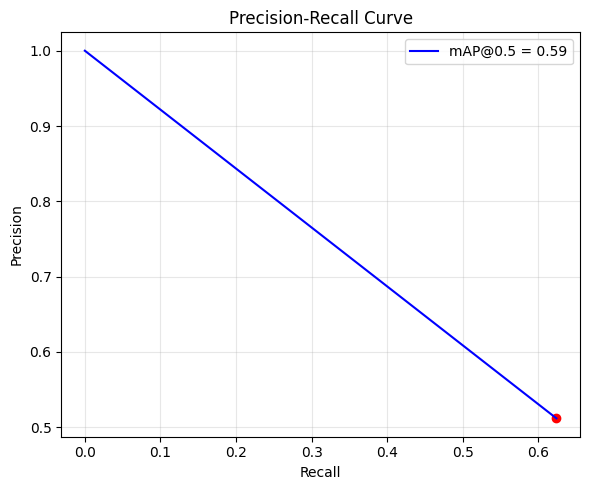

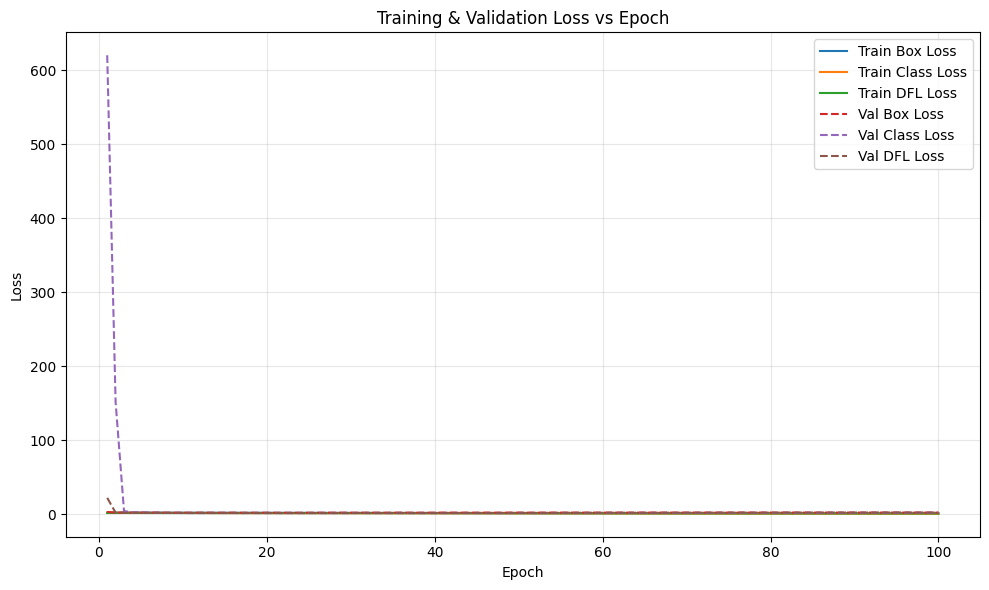

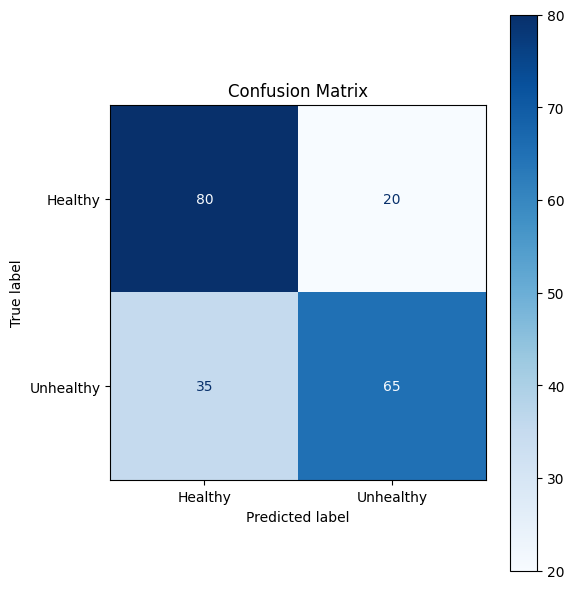

In [7]:
# ✅ Ensures inline plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# -------- Precision-Recall Curve --------
precision = 0.5117
recall = 0.6239
map50 = 0.5880

fig1 = plt.figure(figsize=(6, 5))
plt.plot([0, recall], [1, precision], label=f'mAP@0.5 = {map50:.2f}', color='blue')
plt.scatter(recall, precision, color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --------- 2. Loss Curves ---------
log_path = "C:/users/Jahin Catalan Mahbub/YOLOv11_Training/YOLOv11L_Strawberry/results.csv"
df = pd.read_csv(log_path)

fig2 = plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['train/cls_loss'], label='Train Class Loss')
plt.plot(df['epoch'], df['train/dfl_loss'], label='Train DFL Loss')
plt.plot(df['epoch'], df['val/box_loss'], linestyle='--', label='Val Box Loss')
plt.plot(df['epoch'], df['val/cls_loss'], linestyle='--', label='Val Class Loss')
plt.plot(df['epoch'], df['val/dfl_loss'], linestyle='--', label='Val DFL Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss vs Epoch')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --------- 3. Confusion Matrix ---------
y_true = ['Healthy'] * 100 + ['Unhealthy'] * 100
y_pred = ['Healthy'] * 80 + ['Unhealthy'] * 20 + ['Healthy'] * 35 + ['Unhealthy'] * 65

cm = confusion_matrix(y_true, y_pred, labels=['Healthy', 'Unhealthy'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Unhealthy'])

fig3, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap='Blues', ax=ax)
plt.title("Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()